In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

from tqdm.notebook import tqdm

In [2]:
k = 10000
ne = 1000
n = 50

input_states = []
for i in range(n):
    for j in range(i+1,n):
        input_states.append([i,j])
D = len(input_states)
amplitudes = numpy.ones((len(input_states)), dtype=numpy.complex128) / numpy.sqrt(D)
s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
state_enum = s.get_enumerated_states()

# s = py_entropy.MultiDefectState([[n//2-1,n//2]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)

In [3]:
def plot_cross(s):
    _, state = s.get_state()
    probs = numpy.real((state * numpy.conj(state)).mean(axis=(0,1)))
    pyplot.plot(probs)
    pyplot.show()

    mat = numpy.zeros((n,n), dtype=numpy.float64)

    for (a,b), p in zip(state_enum, probs):
        mat[a,b] += p
        mat[b,a] += p

    pyplot.imshow(numpy.log(mat))
    pyplot.colorbar()
    pyplot.title(r'$P(a\vert b)$')
    pyplot.xlabel('Site')
    pyplot.ylabel('Site')
    pyplot.show()

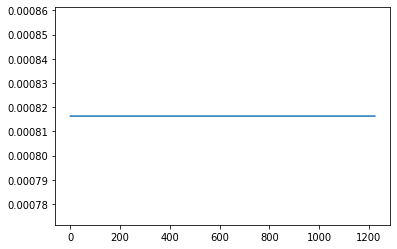

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


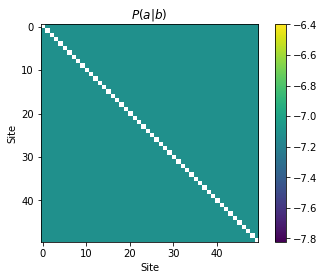

In [4]:
plot_cross(s)

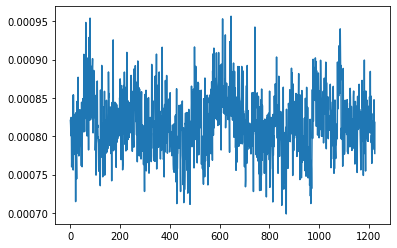

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


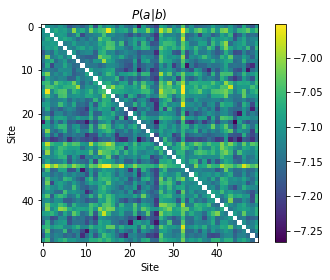

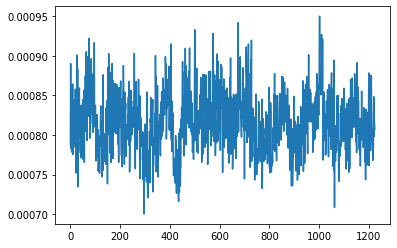

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


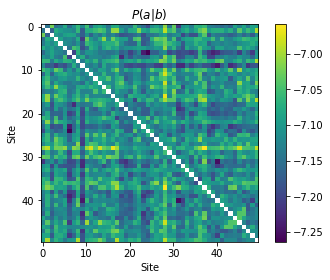

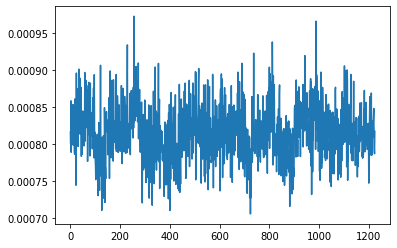

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


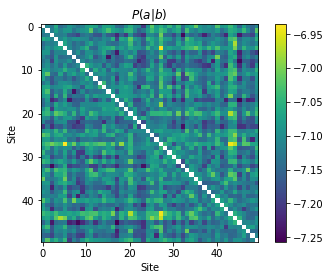

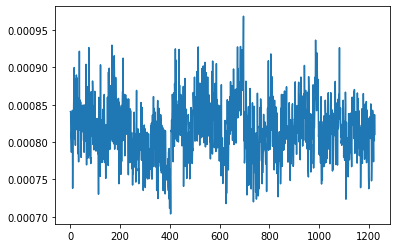

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


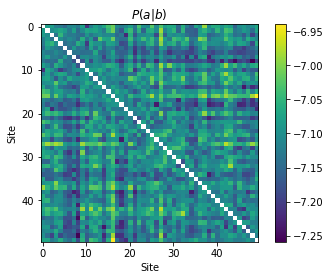

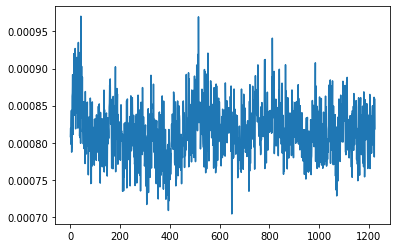

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


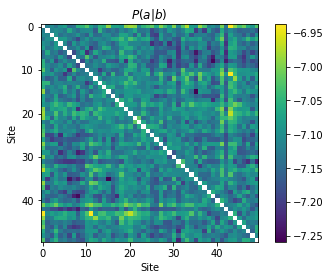

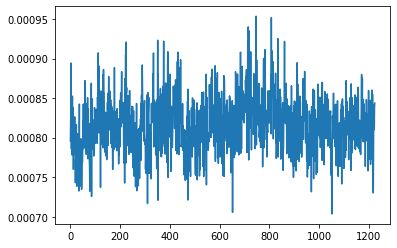

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


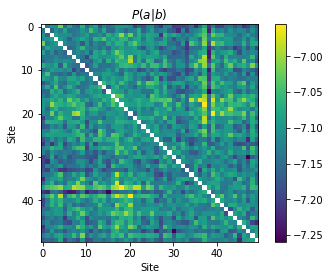

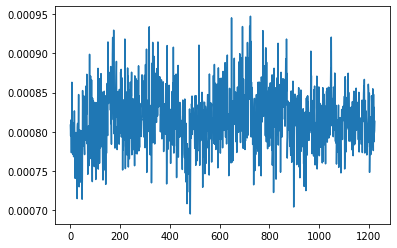

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


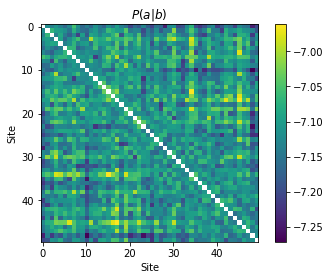

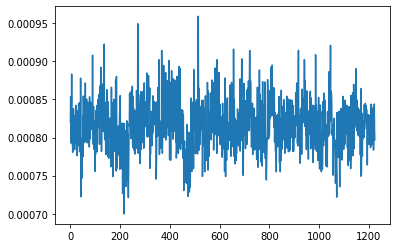

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


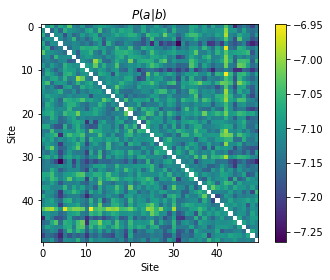

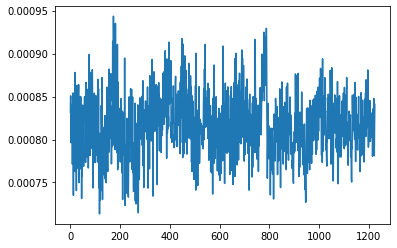

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


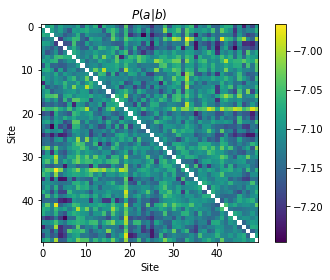

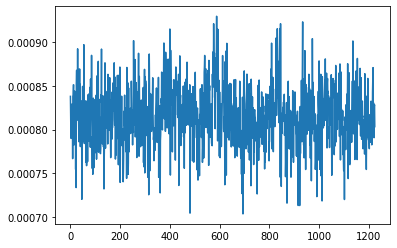

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


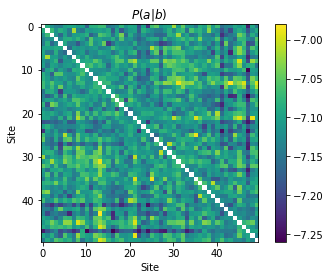

In [5]:
k_to_log = 50
in_groups_of = 10

for _ in range(0, k_to_log, in_groups_of):
    s.apply_alternative_layers(in_groups_of)
    plot_cross(s)

In [6]:
s.apply_alternative_layers(k-k_to_log)

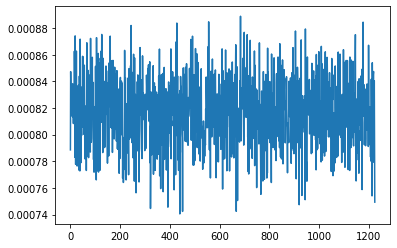

/tmp/ipykernel_12890/805155229.py:13: RuntimeWarning: divide by zero encountered in log
  pyplot.imshow(numpy.log(mat))


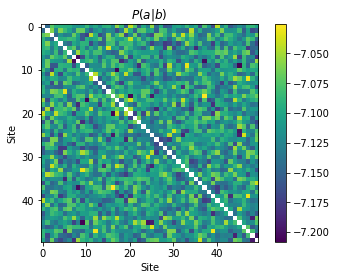

In [7]:
plot_cross(s)

No clumping found